## Dataset Analysis ##

Analyzing datasets for face recognition training:
- **CASIA-WebFace** - Training dataset
- **LFW** - Evaluation dataset

In [ ]:
# Setup and Configuration
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from collections import Counter
from tqdm import tqdm 

# --- CONFIGURATION ---
PROJECT_DIR = Path().resolve().parent 

DATASETS = {
    "CASIA-WebFace (Train)": PROJECT_DIR / "data" / "processed" / "casia",
    "LFW (Eval)": PROJECT_DIR / "data" / "processed" / "lfw_112",
}

print("=" * 50)
print("Dataset Analysis for Face Recognition")
print("=" * 50)

for name, path in DATASETS.items():
    status = "Found" if path.exists() else "Not found"
    print(f"{name}: {path}")
    print(f"   Status: {status}")
print()

Dataset Analysis for Face Recognition
CASIA-WebFace (Train): /home/kamil/edge-face-recognition/data/processed/casia
   Status: Found
LFW (Eval): /home/kamil/edge-face-recognition/data/processed/lfw_112
   Status: Found




Analyzing: CASIA-WebFace (Train)
Indexing image files...
Found 490623 images.
Found 10572 people (identity folders).
Sampling 5000 images...
Starting verification...


100%|██████████| 5000/5000 [00:02<00:00, 2157.52it/s]



No corrupted files found.

Dimension statistics:
Width: min=112, max=112, avg=112.0
Height: min=112, max=112, avg=112.0


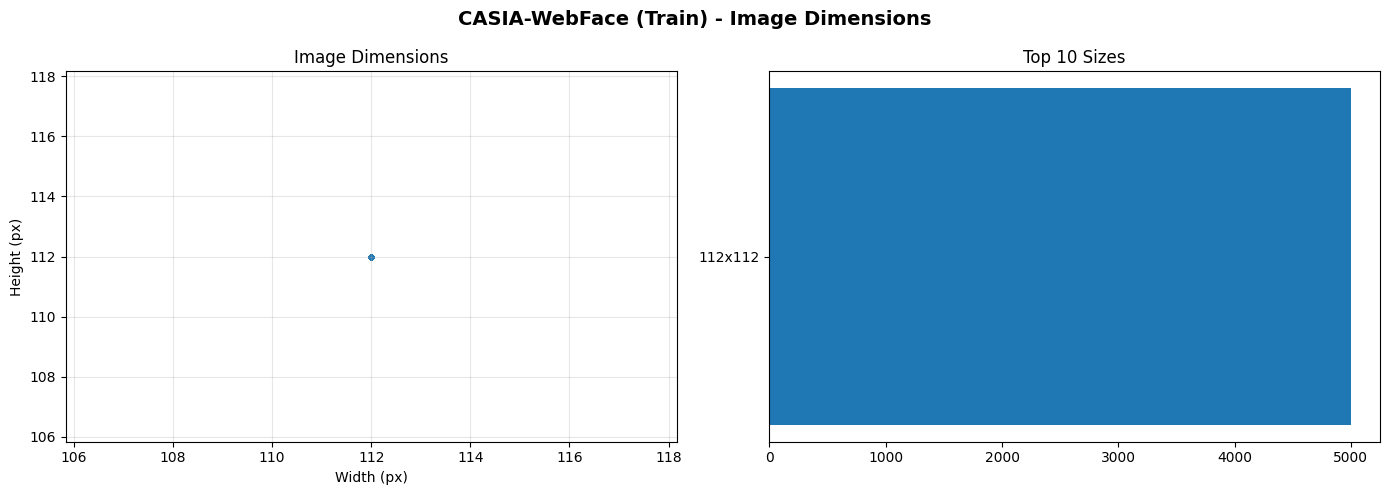


Analyzing: LFW (Eval)
Indexing image files...
Found 13233 images.
Found 5749 people (identity folders).
Sampling 5000 images...
Starting verification...


100%|██████████| 5000/5000 [00:00<00:00, 5086.79it/s]



No corrupted files found.

Dimension statistics:
Width: min=112, max=112, avg=112.0
Height: min=112, max=112, avg=112.0


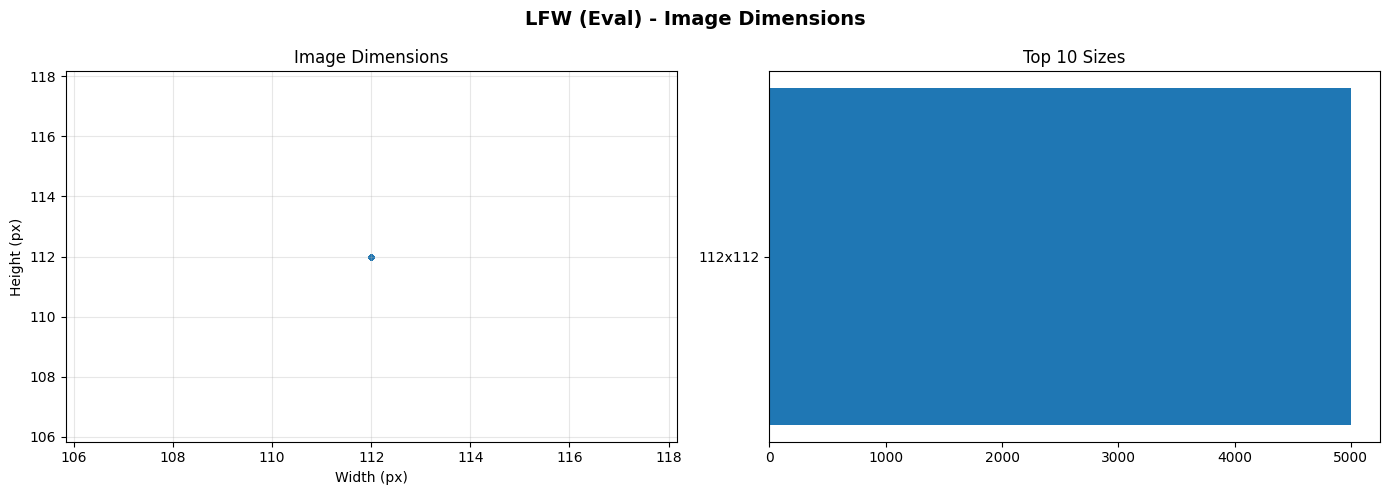

In [8]:
# Image size analysis & Integrity Check

SAMPLE_SIZE = 5000  

for dataset_name, DATA_DIR in DATASETS.items():
    print(f"\n{'='*50}")
    print(f"Analyzing: {dataset_name}")
    print(f"{'='*50}")
    
    if not DATA_DIR.exists():
        print(f"Folder {DATA_DIR} does not exist!")
        continue

    print("Indexing image files...")
    all_image_paths = []

    for root, dirs, files in os.walk(DATA_DIR):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                all_image_paths.append(os.path.join(root, file))

    total_images = len(all_image_paths)
    print(f"Found {total_images} images.")

    identity_folders = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
    num_people = len(identity_folders)
    print(f"Found {num_people} people (identity folders).")

    if total_images == 0:
        print("No images to analyze.")
        continue
    
    if SAMPLE_SIZE and SAMPLE_SIZE < total_images:
        print(f"Sampling {SAMPLE_SIZE} images...")
        paths_to_check = random.sample(all_image_paths, SAMPLE_SIZE)
    else:
        print(f"Checking ALL {total_images} images...")
        paths_to_check = all_image_paths

    sizes = []
    corrupted_files = []

    print("Starting verification...")
    for img_path in tqdm(paths_to_check):
        try:
            with Image.open(img_path) as img:
                sizes.append(img.size)
                img.verify() 
        except Exception as e:
            corrupted_files.append(img_path)

    if corrupted_files:
        print(f"\nFOUND {len(corrupted_files)} CORRUPTED FILES! (Examples: {corrupted_files[:3]})")
    else:
        print("\nNo corrupted files found.")

    if sizes:
        widths, heights = zip(*sizes)
        print(f"\nDimension statistics:")
        print(f"Width: min={min(widths)}, max={max(widths)}, avg={np.mean(widths):.1f}")
        print(f"Height: min={min(heights)}, max={max(heights)}, avg={np.mean(heights):.1f}")

        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        fig.suptitle(f'{dataset_name} - Image Dimensions', fontsize=14, fontweight='bold')
        
        axes[0].scatter(widths, heights, alpha=0.5, s=10)
        axes[0].set_xlabel('Width (px)')
        axes[0].set_ylabel('Height (px)')
        axes[0].set_title('Image Dimensions')
        axes[0].grid(True, alpha=0.3)
        
        size_str = [f'{w}x{h}' for w, h in sizes]
        size_counts = Counter(size_str).most_common(10)
        labels, counts = zip(*size_counts)
        
        axes[1].barh(range(len(labels)), counts)
        axes[1].set_yticks(range(len(labels)))
        axes[1].set_yticklabels(labels)
        axes[1].set_title('Top 10 Sizes')
        
        plt.tight_layout()
        plt.show()


Identity Distribution: CASIA-WebFace (Train)
Processing 10572 folders...


100%|██████████| 10572/10572 [00:00<00:00, 20455.74it/s]



--- SUMMARY: CASIA-WebFace (Train) ---
Number of identities: 10572
Total images: 490623
Average: 46.4 images/person
Min: 2 | Max: 802
Median: 27.0


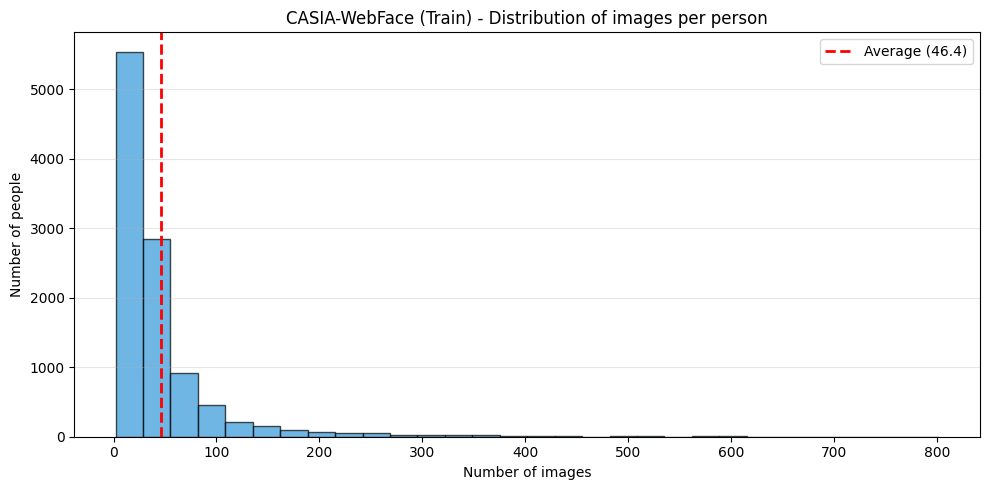


Identity Distribution: LFW (Eval)
Processing 5749 folders...


100%|██████████| 5749/5749 [00:00<00:00, 53173.24it/s]


--- SUMMARY: LFW (Eval) ---
Number of identities: 5749
Total images: 13233
Average: 2.3 images/person
Min: 1 | Max: 530
Median: 1.0


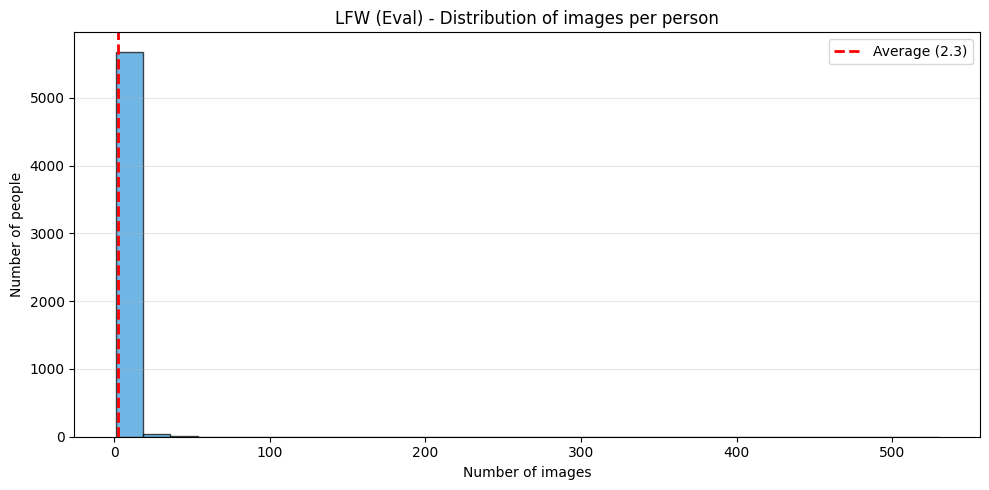

In [6]:
# Distribution of images per identity

for dataset_name, DATA_DIR in DATASETS.items():
    print(f"\n{'='*50}")
    print(f"Identity Distribution: {dataset_name}")
    print(f"{'='*50}")
    
    if not DATA_DIR.exists():
        print(f"Folder does not exist.")
        continue

    counts = []
    identities_list = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])
    
    print(f"Processing {len(identities_list)} folders...")
    
    for identity in tqdm(identities_list):
        path = os.path.join(DATA_DIR, identity)
        n_images = len([f for f in os.listdir(path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        counts.append(n_images)

    if not counts:
        print("No data to analyze.")
        continue
    
    counts = np.array(counts)
    print(f"\n--- SUMMARY: {dataset_name} ---")
    print(f"Number of identities: {len(counts)}")
    print(f"Total images: {counts.sum()}")
    print(f"Average: {counts.mean():.1f} images/person")
    print(f"Min: {counts.min()} | Max: {counts.max()}")
    print(f"Median: {np.median(counts)}")

    plt.figure(figsize=(10, 5))
    plt.hist(counts, bins=30, color='#3498db', edgecolor='black', alpha=0.7)
    plt.axvline(counts.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Average ({counts.mean():.1f})')
    
    plt.title(f'{dataset_name} - Distribution of images per person')
    plt.xlabel('Number of images')
    plt.ylabel('Number of people')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


Sample Images: CASIA-WebFace (Train)


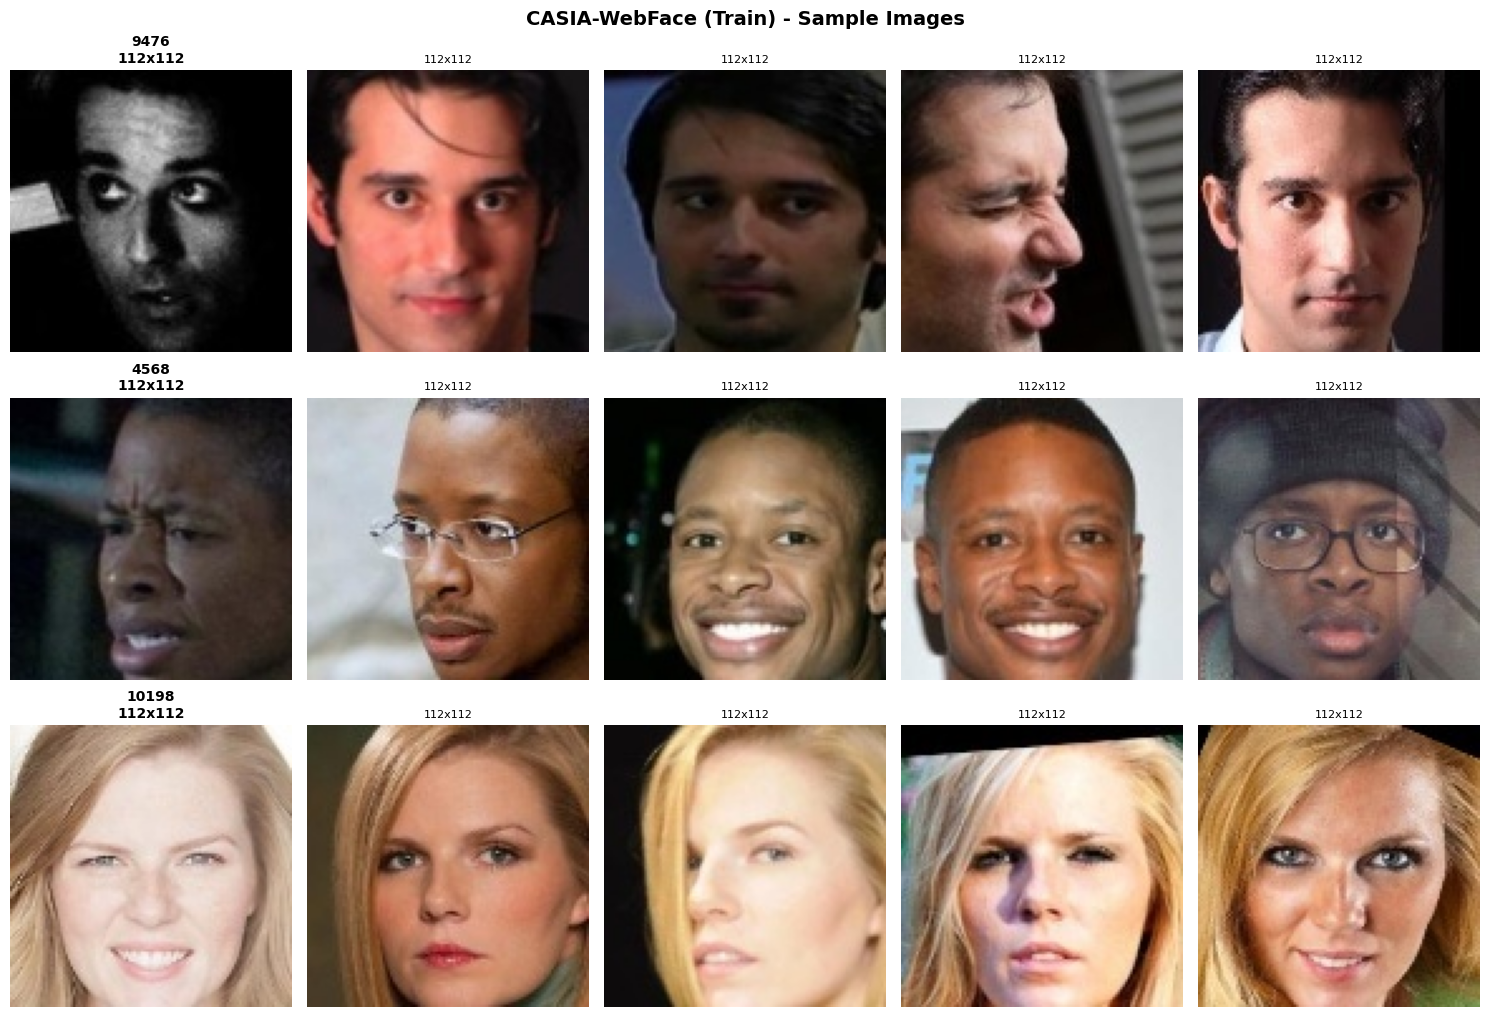


Sample Images: LFW (Eval)


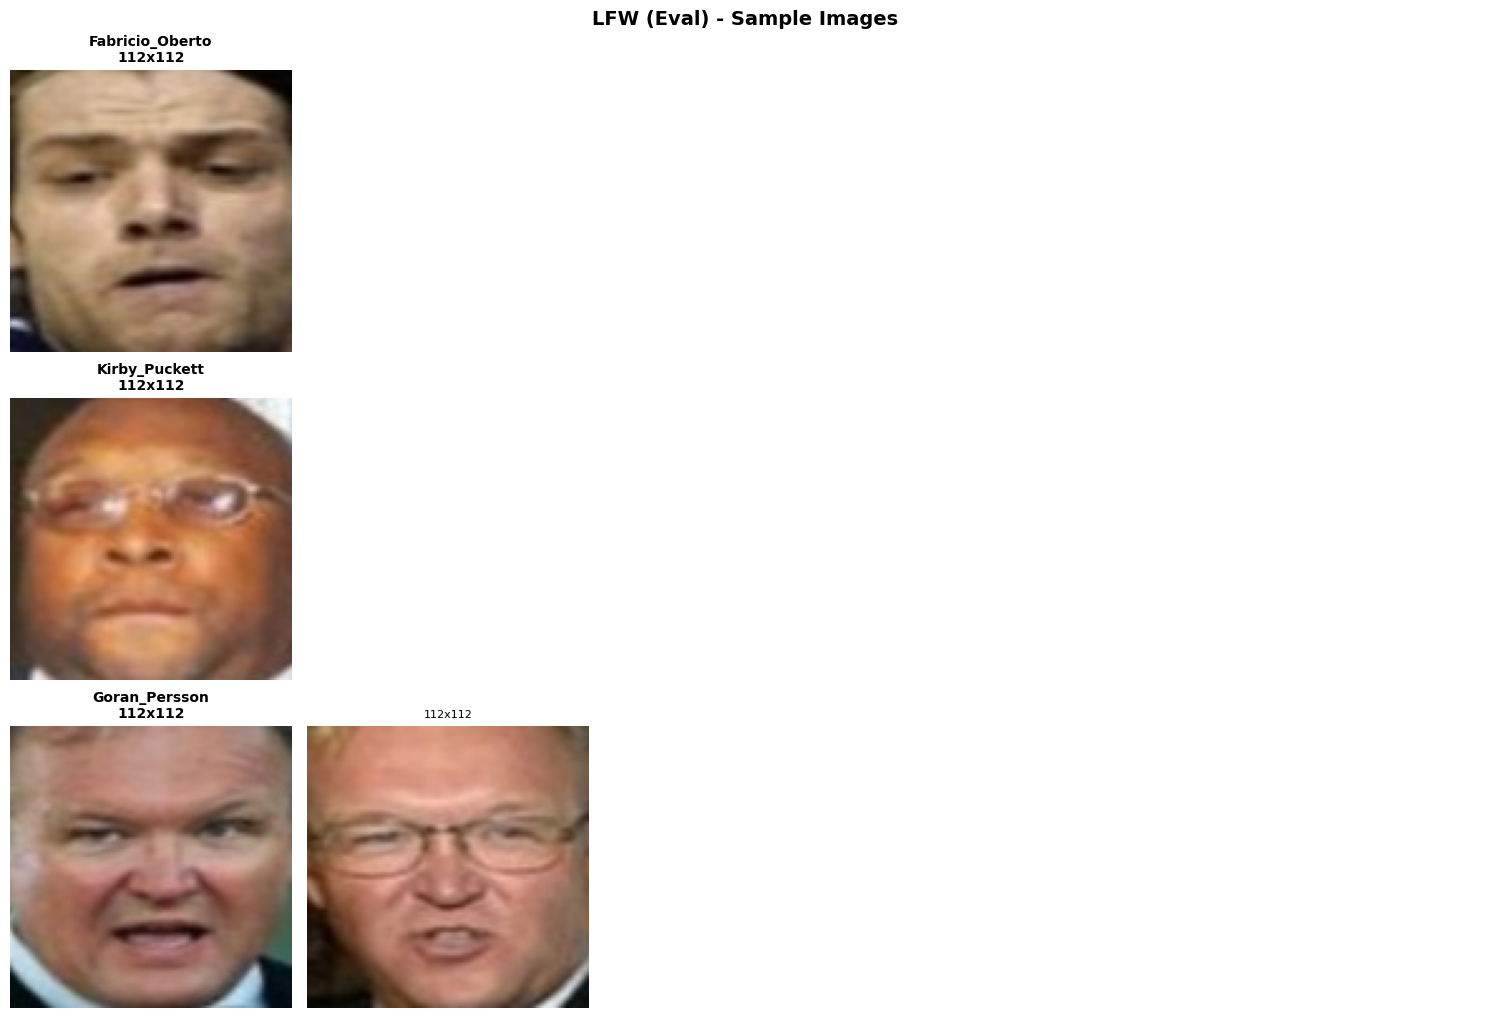

In [20]:
# Display sample images

for dataset_name, DATA_DIR in DATASETS.items():
    print(f"\n{'='*50}")
    print(f"Sample Images: {dataset_name}")
    print(f"{'='*50}")
    
    if not DATA_DIR.exists():
        print(f"Folder does not exist.")
        continue
    
    identities = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])

    if not identities:
        print("No identity folders found!")
        continue
    
    num_samples = min(3, len(identities))
    sample_identities = random.sample(identities, num_samples)
    
    fig, axes = plt.subplots(num_samples, 5, figsize=(15, 3.5 * num_samples))
    fig.suptitle(f'{dataset_name} - Sample Images', fontsize=14, fontweight='bold')
    
    if num_samples == 1: axes = np.array([axes]) 
    if len(axes.shape) == 1: axes = axes.reshape(num_samples, 5)

    for i, identity in enumerate(sample_identities):
        identity_path = os.path.join(DATA_DIR, identity)
        img_files = [f for f in os.listdir(identity_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:5]
        
        for j in range(5):
            ax = axes[i, j]
            ax.axis('off')
            
            if j < len(img_files):
                img_path = os.path.join(identity_path, img_files[j])
                try:
                    img = Image.open(img_path)
                    ax.imshow(img)
                    if j == 0:
                        ax.set_title(f'{identity}\n{img.size[0]}x{img.size[1]}', fontsize=10, fontweight='bold')
                    else:
                        ax.set_title(f'{img.size[0]}x{img.size[1]}', fontsize=8)
                except:
                    pass

    plt.tight_layout()
    plt.show()

## Summary

| Dataset | Purpose | Expected Size |
|---------|---------|---------------|
| CASIA-WebFace | Training | ~10k identities, ~500k images |
| LFW | Evaluation | ~5k identities, ~13k images           |